<a href="https://colab.research.google.com/github/MArifBrohi/Python/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing libararies

In [173]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [113]:
# Our actual dataset contains no col names
columns = ['pregnancies','pGlucose','BloodPressure','skinThikness','Insulin','BMI','diabetes','age','label']

In [119]:
df= pd.read_csv('/content/drive/MyDrive/Machine Learning/Pima Indians Diabetes/pima-indians-diabetes (1).csv',header=None,names=columns)

In [115]:
# df = pd.DataFrame(df)

In [120]:
df.head()

,pregnancies,pGlucose,BloodPressure,skinThikness,Insulin,BMI,diabetes,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###Here we have just 2 cols which are float and each col contain values (Non-Null val)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pregnancies    767 non-null    int64  
 1   pGlucose       767 non-null    int64  
 2   BloodPressure  767 non-null    int64  
 3   skinThikness   767 non-null    int64  
 4   Insulin        767 non-null    int64  
 5   BMI            767 non-null    float64
 6   diabetes       767 non-null    float64
 7   age            767 non-null    int64  
 8   label          767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
df.describe()



,pregnancies,pGlucose,BloodPressure,skinThikness,Insulin,BMI,diabetes,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


####Below code determines that there is no null val

In [104]:
df.isnull().sum()

pregnancies      0
pGlucose         0
BloodPressure    0
skinThikness     0
Insulin          0
BMI              0
diabetes         0
age              0
label            0
dtype: int64

In [122]:
df.shape

(768, 9)

In [123]:
df=df.drop_duplicates()

In [124]:
df.shape

(768, 9)

In [125]:
df.columns

Index(['pregnancies', 'pGlucose', 'BloodPressure', 'skinThikness', 'Insulin',
       'BMI', 'diabetes', 'age', 'label'],
      dtype='object')

In [126]:
print('No: of zero values in Glucose:',df[df['pGlucose']==0].shape[0])
print('No: of zero values in pregnancies:',df[df['pregnancies']==0].shape[0])
print('No: of zero values in BloodPressure:',df[df['BloodPressure']==0].shape[0])
print('No: of zero values in skinThikness:',df[df['skinThikness']==0].shape[0])
print('No: of zero values in Insulin:',df[df['Insulin']==0].shape[0])
print('No: of zero values in BMI:',df[df['BMI']==0].shape[0])
print('No: of zero values in age:',df[df['age']==0].shape[0])
print('No: of zero values in diabetes:',df[df['diabetes']==0].shape[0])

No: of zero values in Glucose: 5
No: of zero values in pregnancies: 111
No: of zero values in BloodPressure: 35
No: of zero values in skinThikness: 227
No: of zero values in Insulin: 374
No: of zero values in BMI: 11
No: of zero values in age: 0
No: of zero values in diabetes: 0


###Replace zero Values with mean or median of that columns


###Replacing values of each col to col means can also be done by LIBARARY -> SimpleImputer

In [127]:
df['pGlucose'] = df['pGlucose'].replace(0,df['pGlucose'].mean())
df['pregnancies'] = df['pregnancies'].replace(0,df['pregnancies'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['skinThikness'] = df['skinThikness'].replace(0,df['skinThikness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [128]:
print('No: of zero values in BMI:',df[df['BMI']==0].shape[0])

No: of zero values in BMI: 0


##All we have done with our dataSet

####Now we are going to step in with our algorithms


#Naive Bayes Algorithm

####First we split our data

I use 70% of data for training and 30% for testing

In [135]:
from sklearn.model_selection import train_test_split

# Here I do nothing but storing all features in X except label Column
X = df.drop('label',axis=1)
# And I store Label column in y
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [137]:
X_test

,pregnancies,pGlucose,BloodPressure,skinThikness,Insulin,BMI,diabetes,age
285,7.0,136.0,74.0,26.000000,135.000000,26.0,0.647,51
101,1.0,151.0,60.0,20.536458,79.799479,26.1,0.179,22
581,6.0,109.0,60.0,27.000000,79.799479,25.0,0.206,27
352,3.0,61.0,82.0,28.000000,79.799479,34.4,0.243,46
726,1.0,116.0,78.0,29.000000,180.000000,36.1,0.496,25
...,...,...,...,...,...,...,...,...
241,4.0,91.0,70.0,32.000000,88.000000,33.1,0.446,22
599,1.0,109.0,38.0,18.000000,120.000000,23.1,0.407,26
650,1.0,91.0,54.0,25.000000,100.000000,25.2,0.234,23
11,10.0,168.0,74.0,20.536458,79.799479,38.0,0.537,34


###Building our Naive Bayes Algorithm

In [140]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() # Just made an object of GaussianNB
model.fit(X_train,y_train)

GaussianNB()

In [152]:
X_train

,pregnancies,pGlucose,BloodPressure,skinThikness,Insulin,BMI,diabetes,age
88,15.000000,136.0,70.0,32.000000,110.000000,37.1,0.153,43
467,3.845052,97.0,64.0,36.000000,100.000000,36.8,0.600,25
550,1.000000,116.0,70.0,28.000000,79.799479,27.4,0.204,21
147,2.000000,106.0,64.0,35.000000,119.000000,30.5,1.400,34
481,3.845052,123.0,88.0,37.000000,79.799479,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2.000000,157.0,74.0,35.000000,440.000000,39.4,0.134,30
715,7.000000,187.0,50.0,33.000000,392.000000,33.9,0.826,34
72,13.000000,126.0,90.0,20.536458,79.799479,43.4,0.583,42
235,4.000000,171.0,72.0,20.536458,79.799479,43.6,0.479,26


In [165]:
y_train.head(11)

88     1
467    0
550    0
147    0
481    0
412    0
248    0
642    1
519    0
730    1
634    0
Name: label, dtype: int64

In [164]:
X_train.head(11)

,pregnancies,pGlucose,BloodPressure,skinThikness,Insulin,BMI,diabetes,age
88,15.000000,136.0,70.0,32.000000,110.000000,37.1,0.153,43
467,3.845052,97.0,64.0,36.000000,100.000000,36.8,0.600,25
550,1.000000,116.0,70.0,28.000000,79.799479,27.4,0.204,21
147,2.000000,106.0,64.0,35.000000,119.000000,30.5,1.400,34
481,3.845052,123.0,88.0,37.000000,79.799479,35.2,0.197,29
412,1.000000,143.0,84.0,23.000000,310.000000,42.4,1.076,22
248,9.000000,124.0,70.0,33.000000,402.000000,35.4,0.282,34
642,6.000000,147.0,80.0,20.536458,79.799479,29.5,0.178,50
519,6.000000,129.0,90.0,7.000000,326.000000,19.6,0.582,60
730,3.000000,130.0,78.0,23.000000,79.000000,28.4,0.323,34


In [162]:
train_predict = model.predict(X_train)

In [163]:
train_predict

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [166]:
from sklearn import metrics

print('Model Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train,train_predict)))

Model Accuracy: 0.7393


###Perfomance of our model with testing data


In [168]:
test_predict = model.predict(X_test)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [169]:

print('Model Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test,test_predict)))

Model Accuracy: 0.7706


#Lets check
###Confusion matrix and classificatio report

CONFUSION MATRIX


<Axes: >

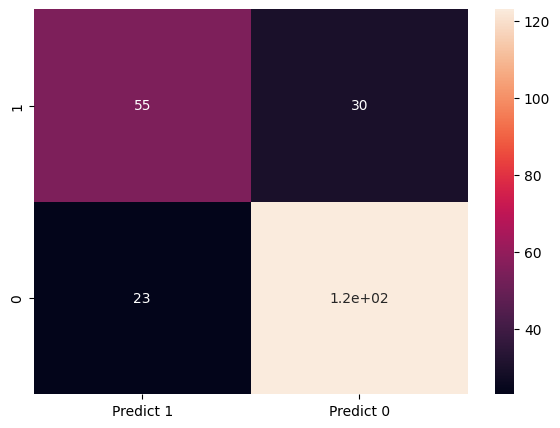

In [174]:
print('CONFUSION MATRIX')

cm = metrics.confusion_matrix(y_test, test_predict, labels=[1,0])

df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm, annot=True)

### REST OF STUF AND CODE IS NOTHING BUT I WAS THINKING ABOUT TO BUILD UP A NEW LOGIC

In [87]:
# Create Nutritional status column

# Nutritional_status = pd.Series([])

<ipython-input-87-f1bde9489123>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Nutritional_status = pd.Series([])


In [88]:
# for i in range(len(df)):
#     if df['BMI'][i] == 0.0:
#         Nutritional_status[i]="NA"

#     elif df['BMI'][i] < 18.5:
#         Nutritional_status[i]="Underweight"

#     elif df['BMI'][i] < 25:
#         Nutritional_status[i]="Normal"

#     elif df['BMI'][i] >= 25 and df['BMI'][i] < 30:
#         Nutritional_status[i]="Overweight"

#     elif df['BMI'][i] >= 30:
#         Nutritional_status[i]="Obese"

#     else:
#         Nutritional_status[i]= df['BMI'][i]

In [89]:
# # Insert new column - Nutritional Status
# df.insert(6, "Nutritional Status", Nutritional_status)

In [90]:
# df.head()

,pregnancies,pGlucose,BloodPressure,skinThikness,Insulin,BMI,Nutritional Status,diabetes,age,label
0,1.000000,85.0,66.0,29.000000,79.90352,26.6,Overweight,0.351,31,0
1,8.000000,183.0,64.0,20.517601,79.90352,23.3,Normal,0.672,32,1
2,1.000000,89.0,66.0,23.000000,94.00000,28.1,Overweight,0.167,21,0
3,3.842243,137.0,40.0,35.000000,168.00000,43.1,Obese,2.288,33,1
4,5.000000,116.0,74.0,20.517601,79.90352,25.6,Overweight,0.201,30,0


In [91]:
# df['Nutritional Status'].value_counts()

Obese          482
Overweight     179
Normal         102
Underweight      4
Name: Nutritional Status, dtype: int64

In [92]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column

# OGTT_Interpretation = pd.Series([])

<ipython-input-92-e76692eb2e02>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  OGTT_Interpretation = pd.Series([])


In [93]:
# for i in range(len(df)):
#     if df['pGlucose'][i] == 0.0:
#         OGTT_Interpretation [i]="NA"

#     elif df['pGlucose'][i] <= 140:
#         OGTT_Interpretation [i]="Normal"

#     elif df['pGlucose'][i] > 140 and df['pGlucose'][i] <= 198:
#         OGTT_Interpretation [i]="Impaired Glucose Tolerance"

#     elif df['pGlucose'][i] > 198:
#         OGTT_Interpretation[i]="Diabetic Level"

#     else:
#         OGTT_Interpretation [i]= df['pGlucose'][i]

In [94]:
# df.insert(2,'Glocose Result',OGTT_Interpretation)

In [95]:
# df['Glocose Result'].value_counts()

Normal                        576
Impaired Glucose Tolerance    190
Diabetic Level                  1
Name: Glocose Result, dtype: int64

In [96]:
# df.head()

,pregnancies,pGlucose,Glocose Result,BloodPressure,skinThikness,Insulin,BMI,Nutritional Status,diabetes,age,label
0,1.000000,85.0,Normal,66.0,29.000000,79.90352,26.6,Overweight,0.351,31,0
1,8.000000,183.0,Impaired Glucose Tolerance,64.0,20.517601,79.90352,23.3,Normal,0.672,32,1
2,1.000000,89.0,Normal,66.0,23.000000,94.00000,28.1,Overweight,0.167,21,0
3,3.842243,137.0,Normal,40.0,35.000000,168.00000,43.1,Obese,2.288,33,1
4,5.000000,116.0,Normal,74.0,20.517601,79.90352,25.6,Overweight,0.201,30,0
